In [117]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import sklearn 
from pandas import Series, DataFrame 
from pylab import rcParams 
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report 

### Import data

In [118]:
Url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv "
titanic_df = pd.read_csv(Url)

In [119]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [120]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [121]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [122]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [123]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Retain only Pclass, Sex, Age, SibSp, Parch, Fare for model training

In [124]:
new_df = titanic_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
new_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


## Fill Nan values in Age with mean

In [128]:
new_df['Age'].fillna((new_df['Age'].mean()),inplace=True)
new_df.isnull().sum()

/Users/pxv8en1/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [129]:
new_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


## Data visualizations about the patterns in dataset

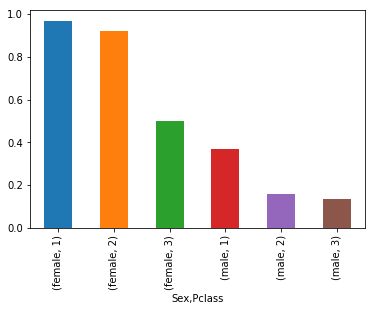

In [130]:
new_df.groupby(['Sex','Pclass'])['Survived'].mean().plot(kind='bar')

In [131]:
new_df.groupby(['Sex','Pclass'])['Survived'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64

## Convert categorical fields to into new columns using One Hot encoding

In [132]:
final_df = pd.get_dummies(new_df,columns=['Pclass','Sex'])

In [133]:
final_df.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,0,1,0,1
1,38.0,1,0,71.2833,1,1,0,0,1,0
2,26.0,0,0,7.9250,1,0,0,1,1,0
3,35.0,1,0,53.1000,1,1,0,0,1,0
4,35.0,0,0,8.0500,0,0,0,1,0,1


## Features for training our model

In [134]:
# Drop Survived from dataframe since it is the target
X = final_df.drop(['Survived'],axis=1)
# Assign Survived column to new variable y
y = final_df['Survived']

## using Decision Tree Classifier to train the model

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 34)
dt = DecisionTreeClassifier(min_samples_split=20)

In [162]:
#Fit it to training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [163]:
y_pred = dt.predict(X_test)
dt.score(X_test,y_test)

0.8116591928251121

## Using cross validation to determine accuracy

In [164]:
scores_cv = cross_val_score(DecisionTreeClassifier(min_samples_split=20), X, y, scoring='accuracy', cv=10)
print(scores_cv)
print(np.mean(scores_cv))

[0.73333333 0.8        0.75280899 0.80898876 0.91011236 0.78651685
 0.86516854 0.7752809  0.85393258 0.84090909]
0.812705141300647


We got 81% accuracy with cross validation, so it is neither overfitting or underfitting the data